In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

In [2]:
map = gpd.read_file('./REGIONE_LOMBARDIA/Comuni_correnti_poligonali.shp')
map = map.to_crs({'init': 'epsg:4326'})
map.to_csv('./REGIONE_LOMBARDIA/asdaad.csv')
map['NOME_COM'] = map['NOME_COM'].str.replace('`', "'")
map.head()

/home/paolo/.local/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,OBJECTID,CLASSREF,BELFIORE,COD_ISTATN,NOME_COM,COD_PRO,NOME_PRO,SIG_PRO,COD_CMO,NOME_CMO,...,ANNO,ISTAT,LEGGE_ISTI,ATS_COD,ATS_DEC,CMETR_COD,CMETR_DEC,SHAPE_AREA,SHAPE_LEN,geometry
0,58,2ec835aa-55fd-4157-a4ef-9762bf1c4eac,A533,03016017,AZZONE,16,BERGAMO,BG,ZO09,VALLE DI SCALVE,...,1980,16017,None,030325,ATS DI BERGAMO,None,None,1.731573e+07,22193.780488,"POLYGON ((10.11432 45.93747, 10.11393 45.93752..."
1,63,93c3bba6-7115-4e4e-8426-a8752b94d9ee,I894,03018152,SPESSA,18,PAVIA,PV,None,None,...,1980,18152,None,030328,ATS DI PAVIA,None,None,1.236544e+07,16260.447426,"POLYGON ((9.36064 45.13149, 9.36010 45.12986, ..."
2,70,ade53e93-78e7-4990-b979-88de73da9ea1,D660,03098026,FOMBIO,98,LODI,LO,None,None,...,1980,98026,None,030321,ATS DELLA CITTA' METROPOLITANA DI MILANO,None,None,7.456725e+06,19279.664351,"POLYGON ((9.70211 45.14260, 9.70212 45.14259, ..."
3,71,d2fa448d-1769-4d7e-8189-1e78981391f3,G388,03018110,PAVIA,18,PAVIA,PV,None,None,...,2012,18110,None,030328,ATS DI PAVIA,None,None,6.323801e+07,47660.027322,"POLYGON ((9.20950 45.22094, 9.20963 45.22098, ..."
4,72,6c49be44-c6c3-497f-8dcb-2f4b5c8f9753,L788,03018175,VERRUA PO,18,PAVIA,PV,None,None,...,1980,18175,None,030328,ATS DI PAVIA,None,None,1.083022e+07,18259.383988,"POLYGON ((9.16910 45.13717, 9.17490 45.13226, ..."


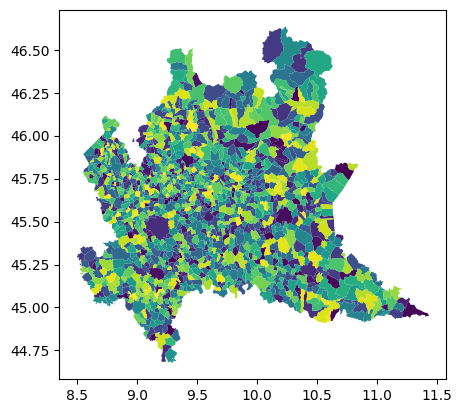

In [3]:
ax = map.plot(column="OBJECTID")
ax.set_axis_on()

In [4]:
# load agrimonia dataset 
agrimonia_dataset = gpd.read_file('./AgrImOnIA/Agrimonia_Dataset.csv')
agrimonia_dataset.head()

,IDStations,Latitude,Longitude,Time,Altitude,AQ_pm10,AQ_pm25,AQ_co,AQ_nh3,AQ_nox,...,EM_nox_traffic,EM_nox_sum,EM_so2_sum,LI_pigs,LI_bovine,LA_hvi,LA_lvi,LA_land_use,LA_soil_use,geometry
0,1264,46.1678524,9.87920992,2016-01-01,290,6.200e+01,5.300e+01,NaN,NaN,8.263e+01,...,8.359e-01,1.720e+00,3.906e-01,3.832e-01,5.892e+00,3.998e+00,1.234e+00,112,17,None
1,1264,46.1678524,9.87920992,2016-01-02,290,7.300e+01,6.300e+01,NaN,NaN,1.017e+02,...,8.372e-01,1.720e+00,3.911e-01,3.832e-01,5.892e+00,3.997e+00,1.234e+00,112,17,None
2,1264,46.1678524,9.87920992,2016-01-03,290,4.400e+01,3.900e+01,NaN,NaN,6.626e+01,...,8.384e-01,1.720e+00,3.916e-01,3.832e-01,5.892e+00,3.997e+00,1.234e+00,112,17,None
3,1264,46.1678524,9.87920992,2016-01-04,290,3.100e+01,2.900e+01,NaN,NaN,6.331e+01,...,8.396e-01,1.720e+00,3.923e-01,3.832e-01,5.892e+00,3.997e+00,1.234e+00,112,17,None
4,1264,46.1678524,9.87920992,2016-01-05,290,2.700e+01,2.600e+01,NaN,NaN,7.553e+01,...,8.409e-01,1.720e+00,3.931e-01,3.832e-01,5.892e+00,3.997e+00,1.233e+00,112,17,None


In [5]:
# aggregate stations
aggregation_funcs = {'Latitude': 'first', 'Longitude': 'first'}
stations = agrimonia_dataset.groupby('IDStations').agg(aggregation_funcs)
stations.head() 

,Latitude,Longitude
IDStations,,
1264,46.1678524,9.87920992
1265,45.3027835,9.49527370
1266,45.2334936,9.66625038
1269,45.6497025,9.60122334
1274,46.0158283,9.28640921


In [6]:
# import Overpass API from OpenStreetMap
from OSMPythonTools.overpass import Overpass as ovp

In [7]:
def get_common_data(latitude, longitude):
    common_query = f'''
    is_in({latitude},{longitude});
    area._[admin_level="8"];
    out;
    '''

    region_query = f'''
    is_in({latitude},{longitude});
    area._[admin_level="4"];
    out;
    '''

    common_data = ovp().query(common_query)
    common_name = common_data.elements()[0].tags().get('name').upper() 

    region_data = ovp().query(region_query); 
    region_name = region_data.elements()[0].tags().get('name').upper()

    return common_name, region_name

In [8]:
stations_locations = [get_common_data(stations.iloc[i, 0], stations.iloc[i, 1]) for i in range(stations.shape[0])]
stations_locations

[('SONDRIO', 'LOMBARDIA'),
 ('LODI', 'LOMBARDIA'),
 ('BERTONICO', 'LOMBARDIA'),
 ('DALMINE', 'LOMBARDIA'),
 ('PERLEDO', 'LOMBARDIA'),
 ('SPINADESCO', 'LOMBARDIA'),
 ('MONZA', 'LOMBARDIA'),
 ('BRESCIA', 'LOMBARDIA'),
 ('BRESCIA', 'LOMBARDIA'),
 ('MILANO', 'LOMBARDIA'),
 ('SESTO SAN GIOVANNI', 'LOMBARDIA'),
 ('RHO', 'LOMBARDIA'),
 ('TURBIGO', 'LOMBARDIA'),
 ('MILANO', 'LOMBARDIA'),
 ('CINISELLO BALSAMO', 'LOMBARDIA'),
 ('PIOLTELLO', 'LOMBARDIA'),
 ('MILANO', 'LOMBARDIA'),
 ('MEDA', 'LOMBARDIA'),
 ('CORMANO', 'LOMBARDIA'),
 ('MOTTA VISCONTI', 'LOMBARDIA'),
 ('MAGENTA', 'LOMBARDIA'),
 ('MILANO', 'LOMBARDIA'),
 ('ARCONATE', 'LOMBARDIA'),
 ('VARESE', 'LOMBARDIA'),
 ('SARONNO', 'LOMBARDIA'),
 ('BUSTO ARSIZIO', 'LOMBARDIA'),
 ('VARESE', 'LOMBARDIA'),
 ('COMO', 'LOMBARDIA'),
 ('ERBA', 'LOMBARDIA'),
 ('CANTÙ', 'LOMBARDIA'),
 ('SONDRIO', 'LOMBARDIA'),
 ('BORMIO', 'LOMBARDIA'),
 ('MORBEGNO', 'LOMBARDIA'),
 ('COLICO', 'LOMBARDIA'),
 ('LECCO', 'LOMBARDIA'),
 ('MERATE', 'LOMBARDIA'),
 ('BERGAMO', 'LO

In [9]:
# associate common names and regions to stations 
stations['COM_NAME'], stations['REGION'] = zip(*stations_locations)
stations.to_csv("./REGIONE_LOMBARDIA/stations_locations.csv")
stations


,Latitude,Longitude,COM_NAME,REGION
IDStations,,,,
1264,46.1678524,9.87920992,SONDRIO,LOMBARDIA
1265,45.3027835,9.49527370,LODI,LOMBARDIA
1266,45.2334936,9.66625038,BERTONICO,LOMBARDIA
1269,45.6497025,9.60122334,DALMINE,LOMBARDIA
1274,46.0158283,9.28640921,PERLEDO,LOMBARDIA
...,...,...,...,...
STA.IT2102A,45.8988000,8.41570000,OMEGNA,PIEMONTE
STA.IT2121A,45.6894000,8.45840000,BORGOMANERO,PIEMONTE
STA.IT2156A,44.7002780,10.62277800,REGGIO EMILIA,EMILIA-ROMAGNA


<Axes: >

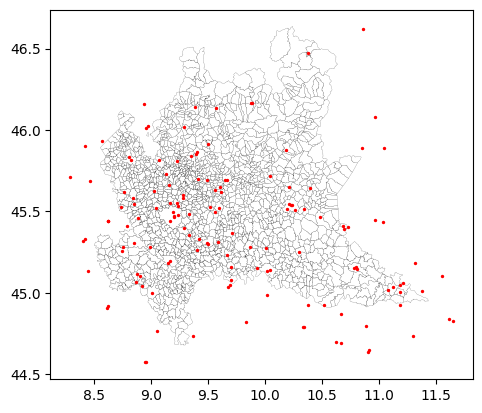

In [10]:
from shapely.geometry import Point

latitudes = stations['Latitude'].tolist()
longitudes = stations['Longitude'].tolist()
geometry = [Point(xy) for xy in zip(longitudes, latitudes)]

stations['geometry'] = geometry
stations_df = gpd.GeoDataFrame(geometry=geometry)
stations_df.crs = 'EPSG:4326'
stations_df = stations_df.to_crs(map.crs)

# show all stations
base = map.plot(color='white', edgecolor='black', linewidth=0.1)
stations_df.plot(ax=base, color='red', markersize=2)

In [11]:
# split stations between Lombardy stations and other regions
lombardy_filter = stations['REGION'] == 'LOMBARDIA'

lombardy_stations = stations[lombardy_filter]
outside_stations = stations[-lombardy_filter]

commons_filter = map['NOME_COM'].isin(stations['COM_NAME'])
commons_match = map[commons_filter]

<Axes: >

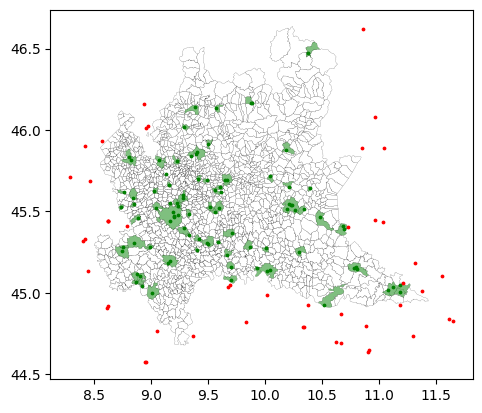

In [12]:
lombardy_stations_df = gpd.GeoDataFrame(geometry=lombardy_stations['geometry'])
outside_stations_df = gpd.GeoDataFrame(geometry=outside_stations['geometry'])

base = map.plot(color='white', edgecolor='black', linewidth=0.1)
commons = commons_match.plot(ax=base, color='green', alpha=0.5)
lombardy_stations_df.crs = map.crs; 
outside_stations_df.crs = map.crs; 
lombardy_ax = lombardy_stations_df.plot(ax=commons, color='green', markersize=3)
outside_stations_df.plot(ax=base, color='red', markersize=3)

In [13]:
print(f"Percentage of available municipalities: {round(commons_match.shape[0]/map['NOME_COM'].shape[0] * 100, 2)}%")

Percentage of available municipalities: 4.92%


In [14]:
dataset_clone = agrimonia_dataset.copy()
# replace NaN values that are badly formatted 
df = dataset_clone.map(lambda x: np.nan if isinstance(x, str) and ('NaN' in x or 'NA' in x) else x)
df.isna().sum(axis=0)

IDStations                          0
Latitude                            0
Longitude                           0
Time                                0
Altitude                            0
AQ_pm10                         89634
AQ_pm25                        208379
AQ_co                          197180
AQ_nh3                         292617
AQ_nox                         107843
AQ_no2                          49132
AQ_so2                         227026
WE_temp_2m                          0
WE_wind_speed_10m_mean              0
WE_wind_speed_10m_max               0
WE_mode_wind_direction_10m          0
WE_tot_precipitation                0
WE_precipication_t                  0
WE_surface_pressure                 0
WE_solar_radiation                  0
WE_rh_min                           0
WE_rh_mean                          0
WE_rh_max                           0
WE_wind_speed_100m_mean             0
WE_wind_speed_100m_max              0
WE_mode_wind_direction_100m         0
WE_blh_layer

In [15]:
columns_with_nan = df.columns[df.isna().any()].tolist()
columns_with_nan

['AQ_pm10',
 'AQ_pm25',
 'AQ_co',
 'AQ_nh3',
 'AQ_nox',
 'AQ_no2',
 'AQ_so2',
 'EM_nh3_livestock_mm',
 'EM_nh3_agr_soils',
 'EM_nh3_agr_waste_burn',
 'EM_nh3_sum',
 'EM_nox_traffic',
 'EM_nox_sum',
 'EM_so2_sum',
 'LI_pigs',
 'LI_bovine',
 'LA_land_use',
 'LA_soil_use',
 'geometry']

In [16]:
fully_availble_cols = df.columns[-df.isna().any()].tolist()
fully_availble_cols

['IDStations',
 'Latitude',
 'Longitude',
 'Time',
 'Altitude',
 'WE_temp_2m',
 'WE_wind_speed_10m_mean',
 'WE_wind_speed_10m_max',
 'WE_mode_wind_direction_10m',
 'WE_tot_precipitation',
 'WE_precipication_t',
 'WE_surface_pressure',
 'WE_solar_radiation',
 'WE_rh_min',
 'WE_rh_mean',
 'WE_rh_max',
 'WE_wind_speed_100m_mean',
 'WE_wind_speed_100m_max',
 'WE_mode_wind_direction_100m',
 'WE_blh_layer_max',
 'WE_blh_layer_min',
 'LA_hvi',
 'LA_lvi']

In [17]:
# Specify the columns for which NaN values should be removed
columns_to_check = df.columns[12:-1]
# columns_to_check = ['EM_nox_traffic', 'LI_pigs', 'LI_bovine']

# Count the number of rows before removal
rows_before = df.shape[0]

# Remove rows with NaN values in the specified columns
df_cleaned = df.dropna(subset=columns_to_check)

# Count the number of rows after removal
rows_after = df_cleaned.shape[0]

# Count the number of removed rows
removed_rows_count = rows_before - rows_after

print("Number of rows before removal:", rows_before)
print("Number of rows after removal:", rows_after)
print("Number of removed rows:", removed_rows_count)
print(f"Percentage removed: {round(removed_rows_count / rows_before * 100, 2)}%")


Number of rows before removal: 309072
Number of rows after removal: 147242
Number of removed rows: 161830
Percentage removed: 52.36%


In [18]:
df_cleaned.head(5)

,IDStations,Latitude,Longitude,Time,Altitude,AQ_pm10,AQ_pm25,AQ_co,AQ_nh3,AQ_nox,...,EM_nox_traffic,EM_nox_sum,EM_so2_sum,LI_pigs,LI_bovine,LA_hvi,LA_lvi,LA_land_use,LA_soil_use,geometry
0,1264,46.1678524,9.87920992,2016-01-01,290,6.200e+01,5.300e+01,NaN,NaN,8.263e+01,...,8.359e-01,1.720e+00,3.906e-01,3.832e-01,5.892e+00,3.998e+00,1.234e+00,112,17,None
1,1264,46.1678524,9.87920992,2016-01-02,290,7.300e+01,6.300e+01,NaN,NaN,1.017e+02,...,8.372e-01,1.720e+00,3.911e-01,3.832e-01,5.892e+00,3.997e+00,1.234e+00,112,17,None
2,1264,46.1678524,9.87920992,2016-01-03,290,4.400e+01,3.900e+01,NaN,NaN,6.626e+01,...,8.384e-01,1.720e+00,3.916e-01,3.832e-01,5.892e+00,3.997e+00,1.234e+00,112,17,None
3,1264,46.1678524,9.87920992,2016-01-04,290,3.100e+01,2.900e+01,NaN,NaN,6.331e+01,...,8.396e-01,1.720e+00,3.923e-01,3.832e-01,5.892e+00,3.997e+00,1.234e+00,112,17,None
4,1264,46.1678524,9.87920992,2016-01-05,290,2.700e+01,2.600e+01,NaN,NaN,7.553e+01,...,8.409e-01,1.720e+00,3.931e-01,3.832e-01,5.892e+00,3.997e+00,1.233e+00,112,17,None


Load covariates for the AgrImOnIA project. Data is on a grid given by latitude and longitude coordinates.

In [19]:
from datetime import datetime
import pandas as pd

AGC_file = 'AgrImOnIA/AGC_Dataset_v_3_0_0.csv' 
AGC_dataset = pd.read_csv(AGC_file)
AGC_dataset['Time'] = pd.to_datetime(AGC_dataset['Time'])

start_date = datetime(2018, 1, 1)
end_date = datetime(2019, 1, 1)
AGC_2018 = AGC_dataset[
    (AGC_dataset['Time'] >= start_date) & 
    (AGC_dataset['Time'] < end_date)
]

AGC_2018.head()

/tmp/ipykernel_82438/4232180546.py:5: DtypeWarning: Columns (4,5,6,8,10,11,12,13,14,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  AGC_dataset = pd.read_csv(AGC_file)


,Latitude,Longitude,Time,Altitude,WE_temp_2m,WE_wind_speed_10m_mean,WE_wind_speed_10m_max,WE_mode_wind_direction_10m,WE_tot_precipitation,WE_precipitation_t,...,EM_nh3_agr_waste_burn,EM_nh3_sum,EM_nox_traffic,EM_nox_sum,EM_so2_sum,LI_pigs,LI_bovine,LA_hvi,LA_lvi,LA_land_use
731,44.35,10.05,2018-01-01,1059.615125,4.129,1.339,1.924,N,0.01771,1,...,0.003037,0.2064,0.3729,0.4792,0.07914,0.3815,3.871,1.496,1.412,311
732,44.35,10.05,2018-01-02,1059.615125,3.411,1.169,2.729,S,0.000004,0,...,0.002952,0.2047,0.3718,0.4779,0.07931,0.3815,3.87,1.495,1.412,311
733,44.35,10.05,2018-01-03,1059.615125,4.04,1.64,3.942,N,0.000333,1,...,0.002861,0.2032,0.3710,0.4768,0.07963,0.3815,3.868,1.494,1.411,311
734,44.35,10.05,2018-01-04,1059.615125,5.556,1.013,1.419,NE,0.000018,0,...,0.002765,0.2019,0.3703,0.4760,0.08008,0.3814,3.867,1.492,1.411,311
735,44.35,10.05,2018-01-05,1059.615125,6.871,1.449,2.412,N,0.001344,1,...,0.002664,0.2010,0.3698,0.4755,0.08066,0.3814,3.866,1.491,1.411,311


In [20]:
day_to_analyze = datetime(2018, 1, 1)
AGC_01_JAN_2018 = AGC_2018[AGC_2018['Time'] == day_to_analyze]
AGC_01_JAN_2018.head()

,Latitude,Longitude,Time,Altitude,WE_temp_2m,WE_wind_speed_10m_mean,WE_wind_speed_10m_max,WE_mode_wind_direction_10m,WE_tot_precipitation,WE_precipitation_t,...,EM_nh3_agr_waste_burn,EM_nh3_sum,EM_nox_traffic,EM_nox_sum,EM_so2_sum,LI_pigs,LI_bovine,LA_hvi,LA_lvi,LA_land_use
731,44.35,10.05,2018-01-01,1059.615125,4.129,1.339,1.924,N,0.01771,1,...,0.003037,0.2064,0.3729,0.4792,0.07914,0.3815,3.871,1.496,1.412,311
2558,44.35,10.15,2018-01-01,1140.262734,2.883,1.256,1.889,N,0.01688,1,...,0.001429,0.2998,0.7253,0.8112,0.04282,0.3029,5.197,1.727,1.704,311
4385,44.35,10.25,2018-01-01,1127.005950,2.831,1.233,1.914,N,0.01578,1,...,0.001155,0.3843,0.5212,0.5861,0.03668,0.2192,5.511,1.615,1.765,311
6212,44.35,10.35,2018-01-01,914.205930,2.375,1.23,1.935,N,0.01487,1,...,0.000000,0.5379,0.5045,0.5904,0.05791,1.913,9.515,2.488,1.751,311
8039,44.35,10.45,2018-01-01,816.719005,2.518,1.281,1.966,N,0.01393,1,...,0.001179,1.1350,0.6042,0.7793,0.06122,6.946,20.73,2.228,2.213,311


In [21]:
import matplotlib.pyplot as plt
polygons = [i for i in map.explode(index_parts=False).geometry]

def overlay_map_to_plt(ax, color='black', linewidth=0.2): 
    for poly in polygons: 
        x, y = poly.exterior.coords.xy
        ax.plot(x, y, color=color, linewidth=linewidth)

/tmp/ipykernel_82438/917667461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AGC_01_JAN_2018['geometry'] = grid_points


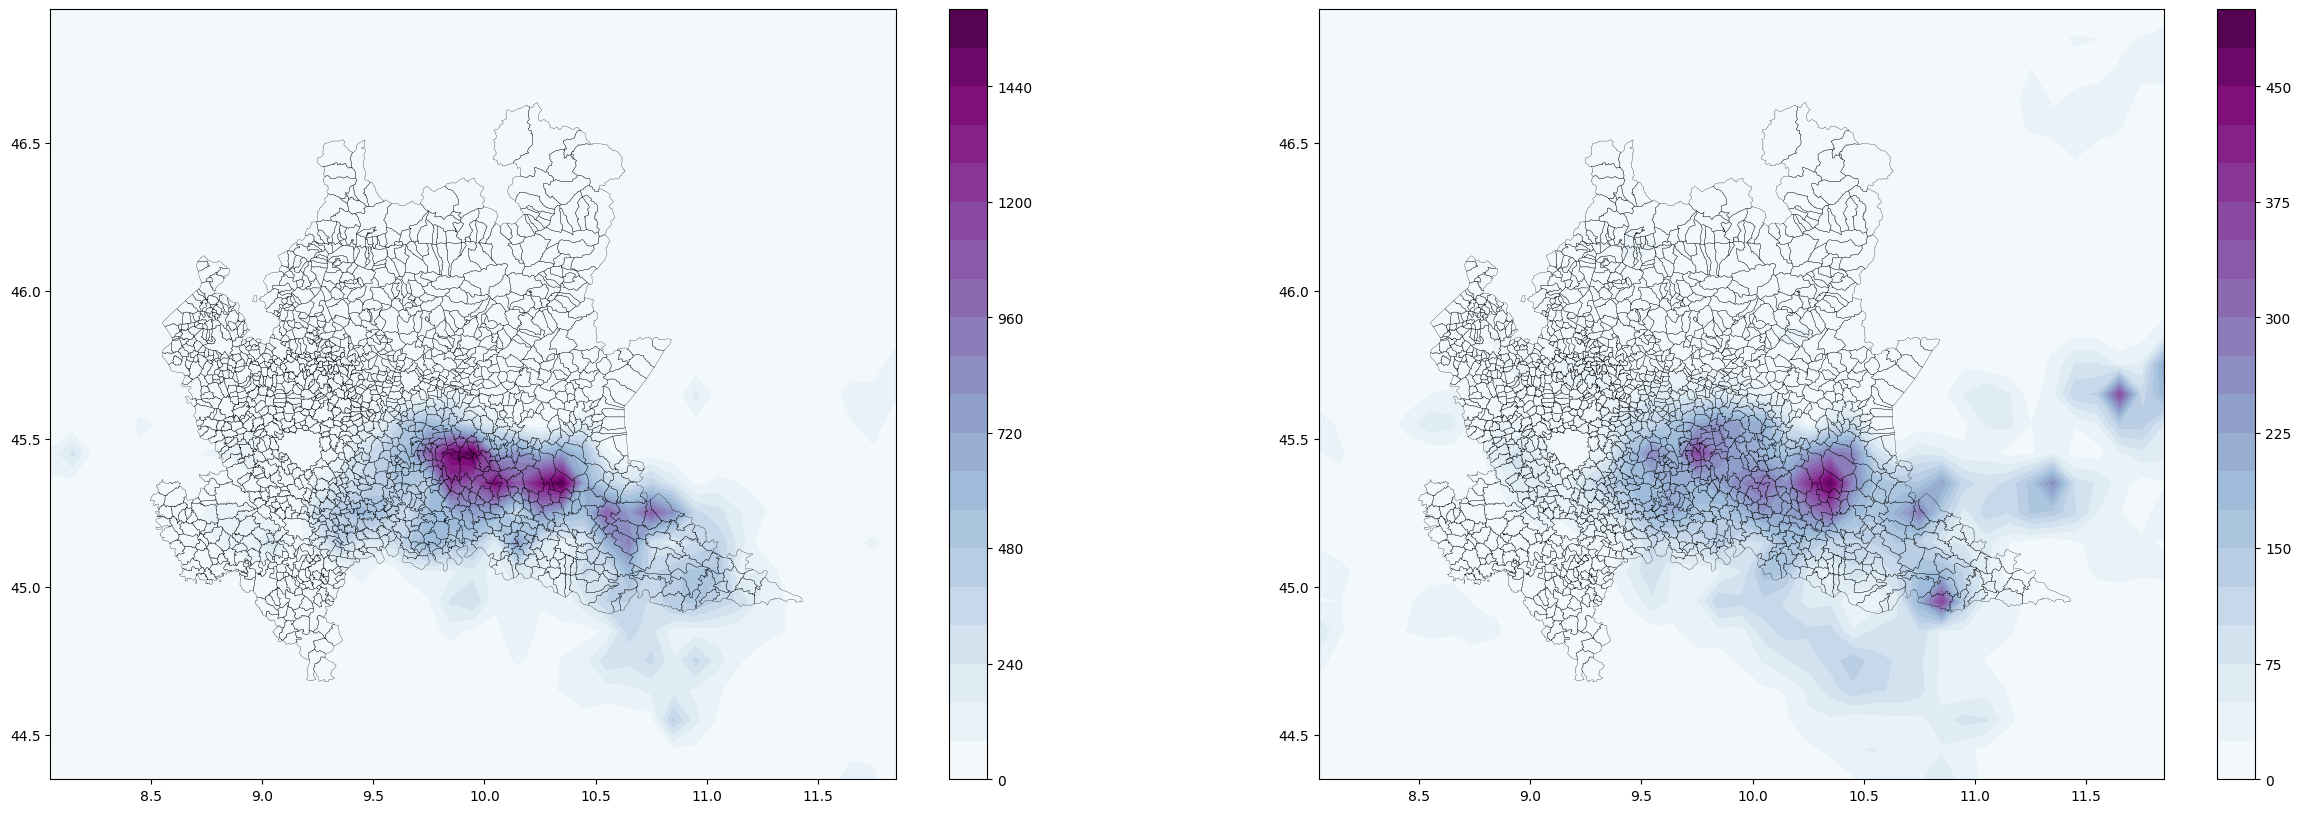

In [22]:
grid_points = [Point(xy) for xy in zip(AGC_01_JAN_2018['Longitude'], AGC_01_JAN_2018['Latitude'])]
AGC_01_JAN_2018['geometry'] = grid_points

AGC_01_JAN_2018 = AGC_01_JAN_2018.map(lambda x: np.nan if isinstance(x, str) and ('NaN' in x or 'NA' in x) else x)
AGC_01_JAN_2018 = AGC_01_JAN_2018.fillna(0)

AGC_01_JAN_2018 = AGC_01_JAN_2018.sort_values(by=['Latitude', 'Longitude'])
lat = np.unique(AGC_01_JAN_2018['Latitude'])
lon = np.unique(AGC_01_JAN_2018['Longitude'])
grid_size_x = len(lon)

pigs = np.array(AGC_01_JAN_2018['LI_pigs'], dtype=float)
bovines = np.array(AGC_01_JAN_2018['LI_bovine'], dtype=float)
pigs = np.reshape(pigs, (-1, grid_size_x))
bovines = np.reshape(bovines, (-1, grid_size_x))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
cf1 = ax1.contourf(lon, lat, pigs, 20, cmap='BuPu')
cf2 = ax2.contourf(lon, lat, bovines, 20, cmap='BuPu')
plt.colorbar(cf1)
plt.colorbar(cf2)

overlay_map_to_plt(ax1)
overlay_map_to_plt(ax2)
plt.show()

In [23]:
stations.to_csv('./StationsGeoLocations.csv')

In [24]:
grid_size_x

39

In [25]:
1053/39

27.0

In [26]:
import re

def lowercase_select_word(input_string, word_to_lowercase):
    # Use a regular expression to find the word and convert it to lowercase
    result = re.sub(rf'\b{re.escape(word_to_lowercase)}\b', word_to_lowercase.lower(), input_string)
    return result

def get_municipality_location(name):
    municipality_query = f'''
    area[name="{name}"][admin_level="8"][boundary=administrative]->.qarea;
    rel(pivot.qarea);
    out center;
    '''

    def coord_filter(center): 
        lat = center['lat']
        lon = center['lon']
        return lon > 8 and lon < 12 and lat > 44 and lat < 47
    
    municipality_data = ovp().query(municipality_query)
    json_data = municipality_data.toJSON()['elements']
    json_data = list(filter(lambda x: coord_filter(x['center']), json_data))
    json_data = json_data[0]['center']

    return json_data['lon'], json_data['lat']


In [27]:
temp = get_municipality_location("Milano") 
temp 


(9.1594985, 45.4612932)

In [28]:
words_to_lowercase = [
    'di', 'con', 'de', 'd', 'sul', 'e', 'delle', 'del', 'della', 'su', 'degli', 
    'dell', 'il', 'al', 'in', 'ed', 'sull', 'dall', 'per', 'dei', 'a'
]

words_to_replace = [
    ('Brega', 'Bregano'), 
    ("Alme'", 'Almè'), 
    ('Cerano Intelvi', "Cerano d'Intelvi"), 
    ('Cadegliano - Viconago', 'Cadegliano-Viconago'),
    ('Brissago - Valtravaglia', 'Brissago Valtravaglia'),
    ("Zerbolo'", "Zerbolò"),
    ("Bascape'", 'Bascapè'),
    ('Uggiate - Trevano', 'Uggiate-Trevano'),
    ('Comezzano - Cizzago', 'Comezzano-Cizzago'),
    ("Salo'", 'Salò'), 
    ("Fenegro'", 'Fenegrò'),
    ("Hoe'", 'Hoè'),
    ("Vigano'", 'Viganò'),
    ('Laveno - Mombello', 'Laveno-Mombello'),
    ('Campospinoso', 'Campospinoso Albaredo'),
    ('Xxiii', 'XXIII'),
    ("Gambolo'", 'Gambolò'),
    ('Cugliate - Fabiasco', 'Cugliate-Fabiasco'),
    ("de'Caprioli", "de' Caprioli"),
    ("Muggio'", 'Muggiò'),
    ('Travedona - Monate', 'Travedona Monate'),
    ('Cocquio - Trevisago', 'Cocquio Trevisago'),
    ("Barzano'", 'Barzanò'),
    ('Gadesco Pieve', 'Gadesco-Pieve'),
    ("Temu'", 'Temù'),
    ("Cantu'", 'Cantù'),
    ('de Pecchi', "de' Pecchi"),
    ('Gabbioneta Binanuova', 'Gabbioneta-Binanuova'),
    ("Travaco' Siccomario", 'Travacò Siccomario'),
    ('Puegnago sul Garda', 'Puegnago del Garda'),
    ('Albaredo Arnaboldi', 'Campospinoso Albaredo'),
    ("Viggiu'", 'Viggiù'),
    ('Casale Cremasco - Vidolasco', 'Casale Cremasco-Vidolasco'),
    ("Roe' Volciano", 'Roè Volciano'),
    ("Montu' Beccaria", 'Montù Beccaria'),
    ('Rodengo - Saiano', 'Rodengo Saiano'),
    ('Sopra Ticino', 'sopra Ticino')
] 

municipalities_names = map['NOME_COM'].sort_values()
municipalities_coords = []

for municipality_name in municipalities_names: 
    name = municipality_name.title()
    for wtl in words_to_lowercase:
        if wtl.title() in name:
            name = lowercase_select_word(name, wtl.title())
    for wtr, rw in words_to_replace: 
        if wtr in name:
            name = name.replace(wtr, rw)
    municipalities_coords.append(get_municipality_location(name))

municipalities = pd.DataFrame({'MUNICIPALITY_NAME': municipalities_names, 'CENTROID': municipalities_coords})

In [29]:
# municipalities.to_csv('./MunicipalitiesCentroids.csv')
municipalities

,MUNICIPALITY_NAME,CENTROID
730,ABBADIA CERRETO,"(9.5939256, 45.3199052)"
772,ABBADIA LARIANA,"(9.3566953, 45.8964877)"
1127,ABBIATEGRASSO,"(8.9016879, 45.3700246)"
257,ACQUAFREDDA,"(10.4079835, 45.304737)"
798,ACQUANEGRA CREMONESE,"(9.8895497, 45.1762854)"
...,...,...
208,ZERBOLO',"(9.0185033, 45.21558)"
634,ZIBIDO SAN GIACOMO,"(9.1091137, 45.3734049)"
1501,ZINASCO,"(9.0301747, 45.112747)"
510,ZOGNO,"(9.6779623, 45.7965207)"


In [30]:
municipalities_geometry = [Point(lon, lat) for lon, lat in municipalities['CENTROID']]
mun_geo = gpd.GeoDataFrame(municipalities, geometry=municipalities_geometry)
mun_geo.drop('CENTROID', axis=1, inplace=True)
mun_geo.to_csv('./MunicipalitiesCentroids.csv')

mun_geo

,MUNICIPALITY_NAME,geometry
730,ABBADIA CERRETO,POINT (9.59393 45.31991)
772,ABBADIA LARIANA,POINT (9.35670 45.89649)
1127,ABBIATEGRASSO,POINT (8.90169 45.37002)
257,ACQUAFREDDA,POINT (10.40798 45.30474)
798,ACQUANEGRA CREMONESE,POINT (9.88955 45.17629)
...,...,...
208,ZERBOLO',POINT (9.01850 45.21558)
634,ZIBIDO SAN GIACOMO,POINT (9.10911 45.37340)
1501,ZINASCO,POINT (9.03017 45.11275)
510,ZOGNO,POINT (9.67796 45.79652)


Series([], Name: MUNICIPALITY_NAME, dtype: object)

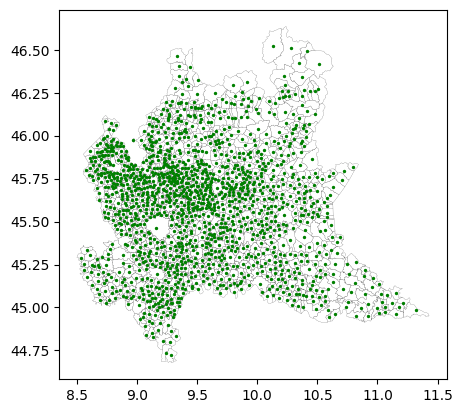

In [31]:
mun_geo.crs = map.crs

# remove points outside Lombardy's lat and lon
filter_df = municipalities['CENTROID'].apply(lambda x: x[0] > 8 and x[0] < 12 and x[1] > 44 and x[1] < 47)
mun_geo_filtered = mun_geo[filter_df]
filtered_municipalities = municipalities[-filter_df]['MUNICIPALITY_NAME']

fig, ax = plt.subplots()
map.plot(ax=ax, color='white', edgecolor='black', linewidth=0.1)
mun_geo_filtered.plot(ax=ax, color='green', markersize=2);

filtered_municipalities